# Section 2.5 — Multiple continuous random variables

This notebook contains all the code examples from **Section 2.5 Multiple continuous random variables**
of the **No Bullshit Guide to Statistics**.

#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# Ensure required Python modules are installed
%pip install --quiet numpy scipy seaborn ministats

Note: you may need to restart the kernel to use updated packages.


In [2]:
# load Python modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (7,2)},
)
%config InlineBackend.figure_format = "retina"

<Figure size 640x480 with 0 Axes>

In [4]:
# Simple float __repr__  
import numpy as np
if int(np.__version__.split(".")[0]) >= 2:
    np.set_printoptions(legacy='1.25')

## Definitions


### Random variables

- **random variable** $X$: a quantity that can take on different values.
- **sample space** $\mathcal{X}$: describes the set of all possible outcomes of the random variable $X$.
- **outcome**: a particular value $\{X = x\}$ that can occur as a result of observing the random variable $X$.
- **event** subset of the sample space $\{a \leq X \leq b\}$ that can occur as a result of observing the random variable $X$.
- $f_X$: the **probability density function** (PDF)
  is a function that assigns probabilities to the different outcome in the sample space of a random variable.
  The probability distribution function of the random variable $X$
  is a function of the form $f_X: \mathcal{X} \to \mathbb{R}$.

## Multiple random variables

### Example 3: bivariate normal distribution

TODO: formula for general bivarate normal

In [5]:
from scipy.stats import multivariate_normal

# parameters
mu = [10, 5]
Sigma = [[  3**2,     0.75*3*1],
         [  0.75*3*1,     1**2]]


# multivariate normal
rvXY = multivariate_normal(mu, Sigma)

In [6]:
rvXY.pdf((10,5))

0.08020655225672235

In [7]:
from scipy.integrate import dblquad

def fXY(x,y):
    """
    Adapter function because `dblquad` expects the function
    we're integrating to be of the form f(y,x), and not f(x,y).
    """
    return rvXY.pdf([y,x])

dblquad(fXY, a=11, b=np.inf, gfun=6, hfun=np.inf)[0]

0.1372330649420418

In [8]:
1 - rvXY.cdf((11,np.inf)) - rvXY.cdf((np.inf,6)) + rvXY.cdf((11,6))

0.13723306482268627

### Joint probability density functions

TODO: formulas

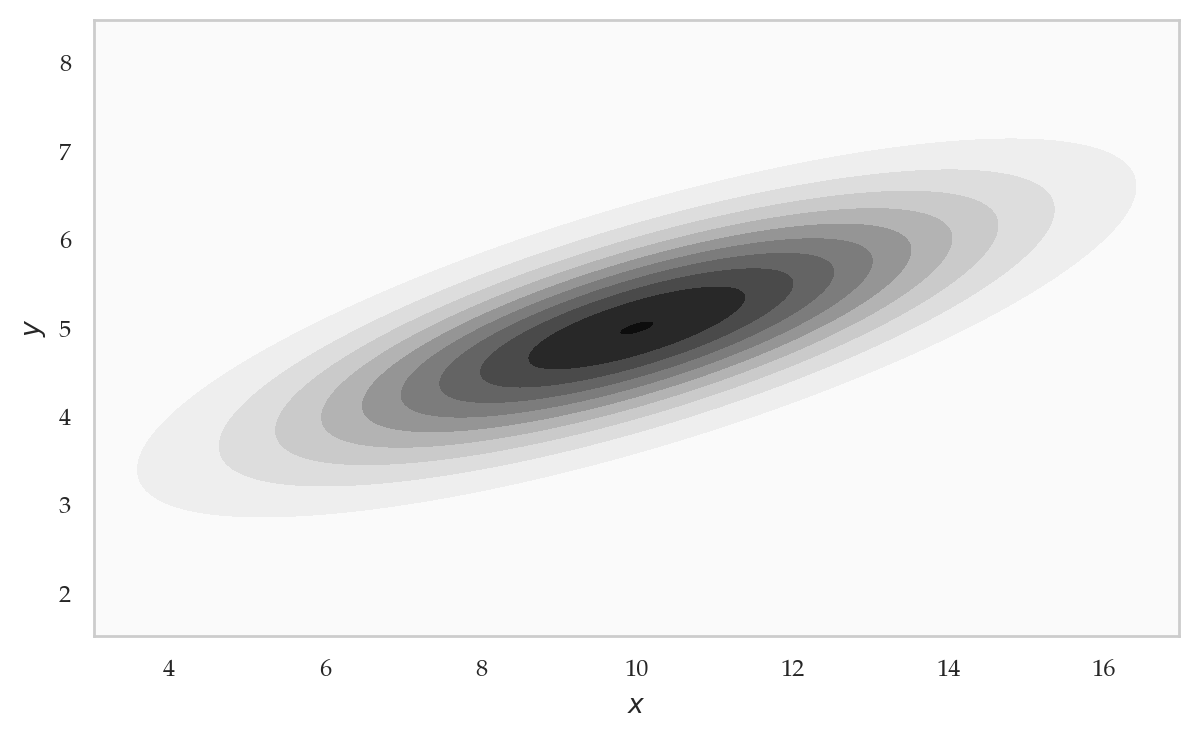

In [9]:
from ministats import plot_joint_pdf_contourf

xlims = [3, 17]
ylims = [1.5, 8.5]

plot_joint_pdf_contourf(rvXY, xlims=xlims, ylims=ylims);

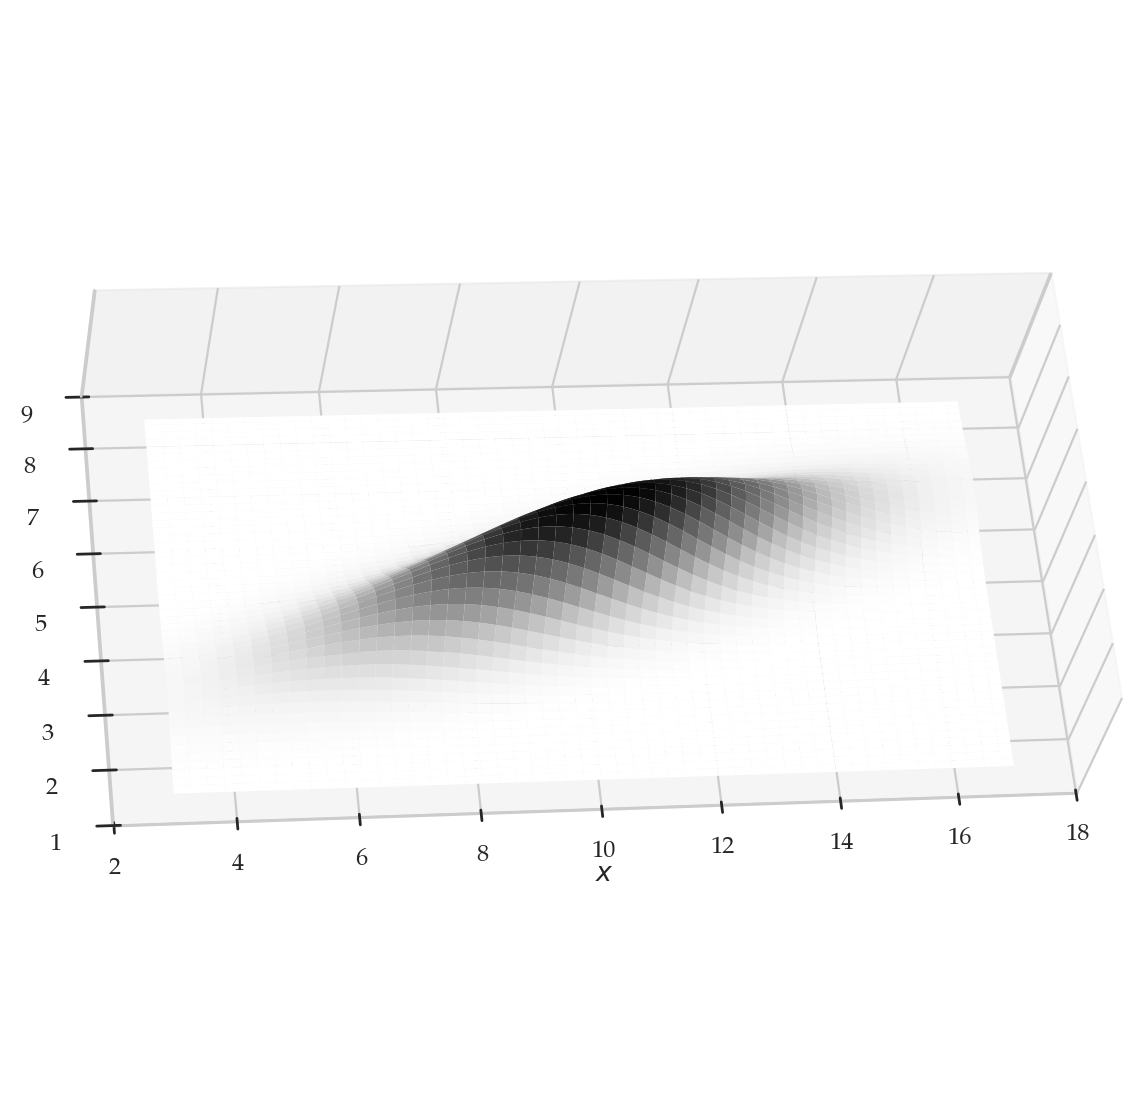

In [10]:
from ministats import plot_joint_pdf_surface

viewdict = dict(elev=60., azim=-110, roll=-16)
plot_joint_pdf_surface(rvXY, xlims=xlims, ylims=ylims, viewdict=viewdict);

### Marginal density functions

TODO: formulas

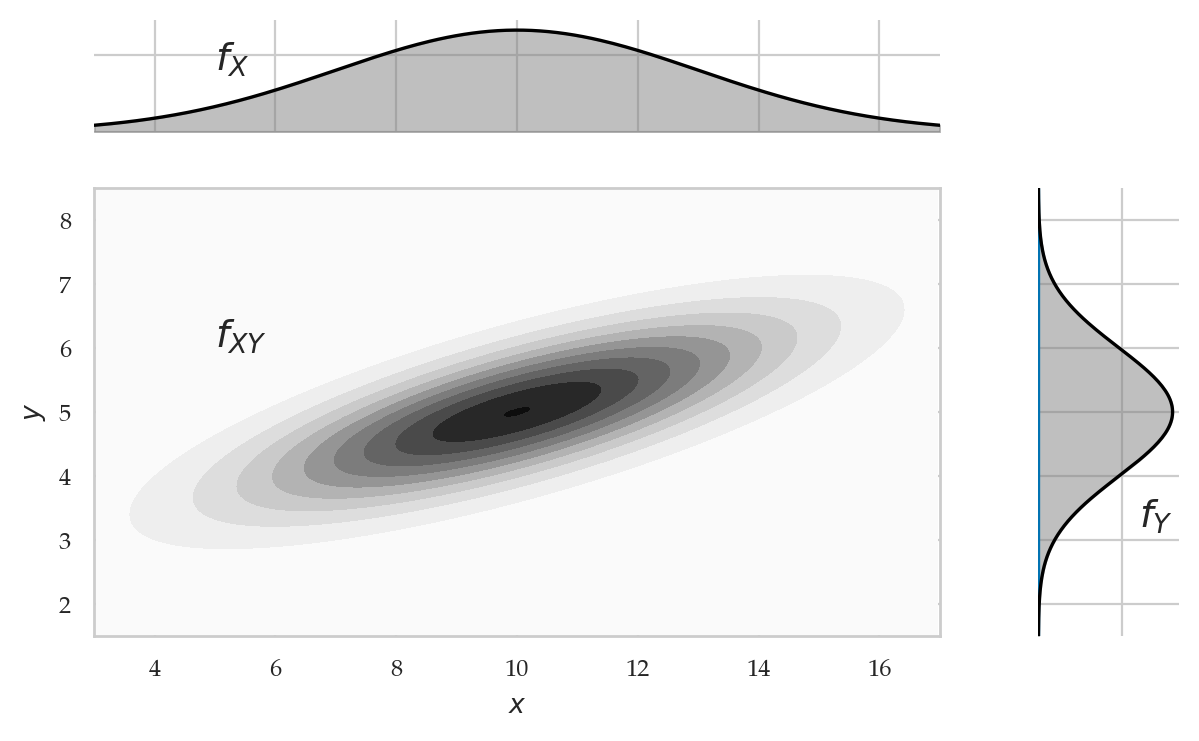

In [11]:
from ministats.book.figures import plot_joint_pdf_and_marginals

plot_joint_pdf_and_marginals(rvXY, xlims=xlims, ylims=ylims);

### Conditional probability density functions

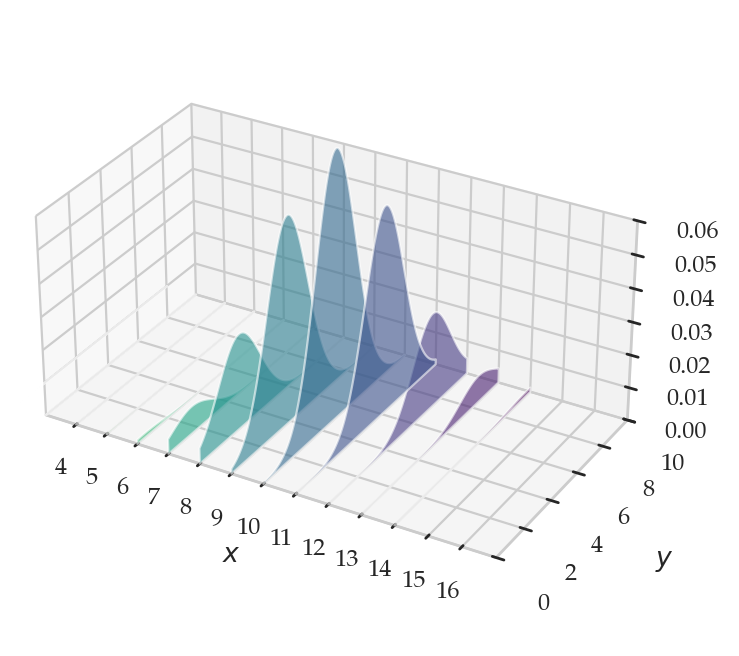

In [12]:
from ministats.book.figures import plot_slices_through_joint_pdf

xcuts = range(2, 15, 1)
plot_slices_through_joint_pdf(rvXY, xlims=[3,17], ylims=[0,10], xcuts=xcuts);

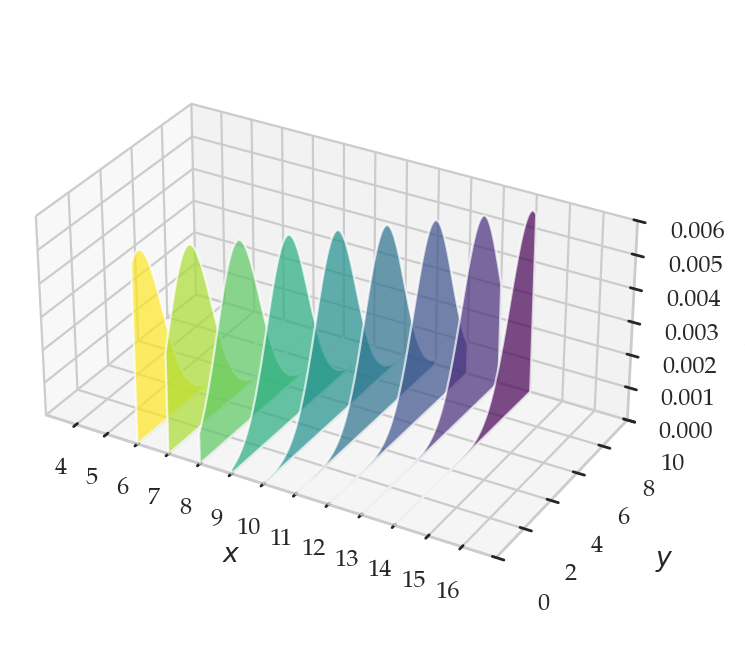

In [13]:
from ministats.book.figures import plot_conditional_fYgivenX

xcuts = range(6, 15, 1)
plot_conditional_fYgivenX(rvXY, xlims=[3,17], ylims=[0,10], xcuts=xcuts);

### Examples

#### Example ?: Multivariate normal

In [14]:
# TODO

### Useful probability formulas

### Multivariable expectation
                                

#### Mean

In [15]:
rvXY.mean

array([10.,  5.])

#### Covariance

In [16]:
Sigma = rvXY.cov
Sigma

array([[9.  , 2.25],
       [2.25, 1.  ]])

In [17]:
covXY = Sigma[0,1]
covXY

2.25

#### Correlation

In [18]:
stdX = np.sqrt(Sigma[0,0])
stdY = np.sqrt(Sigma[1,1])

corrXY = covXY / (stdX * stdY)
corrXY

0.75

### Independent, identically distributed random variabls

TODO formulas

## Discussion

## Exercises

## Links